# Touring Seaborn with Titanic

In this lab, we will use a familiar dataset to explore the use of visualizations in feature analysis and selection.


The objective of this lab is to work through some of the visualization capabilities available in Seaborn. For a more thorough investigation of the capabilities offered by Seaborn, you are encouraged to do the full tutorial linked below. Seaborn is an API to matplotlib. It integrates with pandas dataframes, simplifying the process of visualizing data. It provides simple functions for plotting.

Some of the features that seaborn offers are

* Several built-in themes that improve on the default matplotlib aesthetics
* Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
* Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
* Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
* Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
* A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
* High-level abstractions for structuring grids of plots that let you easily build complex visualizations

We are going to look at 3 useful functions in seaborn: factorplot, pairplot, and joinplot.

** Before running the code in this lab, articulate to your partner what you expect the visualization to look like. Look at the code and the Seaborn documentation to figure out what data is being plotted and what the type of plot may look like.**

sources:

Previous Titanic work: https://github.com/georgetown-analytics/XBUS-503-01.Data_Ingestion_and_Wrangling/tree/master/titanic

Seaborn Tutorial: http://seaborn.pydata.org/tutorial.html


In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [81]:
%matplotlib inline
pd.set_option('display.max_columns', 500)

Like scikit-learn, Seaborn has "toy" datasets available to import for exploration. This includes the Titanic data we have previously looked at. Let's load the Seaborn Titanic dataset and take a look.

(https://github.com/mwaskom/seaborn-data shows the datasets available to load via this method in Seaborn.)

Read [this](https://stackoverflow.com/questions/42098126/mac-osx-python-ssl-sslerror-ssl-certificate-verify-failed-certificate-verify) if you're running Python3.6 and get an SSL error.

In [43]:
df = sns.load_dataset('titanic')

In [82]:
# Write the code to look at the head of the dataframe
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


As you can see, the data has been cleaned up a bit.

We performed some rudimentary visualization for exploratory data analysis previously. For example, we created a histogram using matplotlib to look at the age distirbution of passengers.


/Users/adammorris/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/adammorris/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


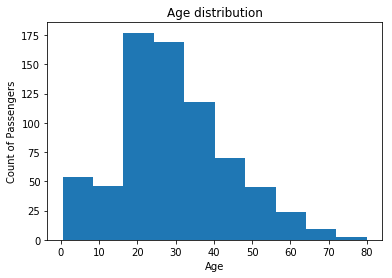

In [83]:
# Create a histogram to examine age distribution of the passengers.

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['age'], bins = 10, range = (df['age'].min(),df['age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

### Factorplot

Our prior work with the Titanic data focused on the available numeric data. Factorplot gives us an easy method to explore some of the categorical data as well. Factorplots allow us to look at a parameter's distribution in bins defined by another parameter.

For example, we can look at the survival rate based on the deck a passenger's cabin was on.

**Remember**: take a look at the documentation first (https://stanford.edu/~mwaskom/software/seaborn/index.html) and figure out what the code is doing. Being able to understand documentation will help you a lot in your projects.

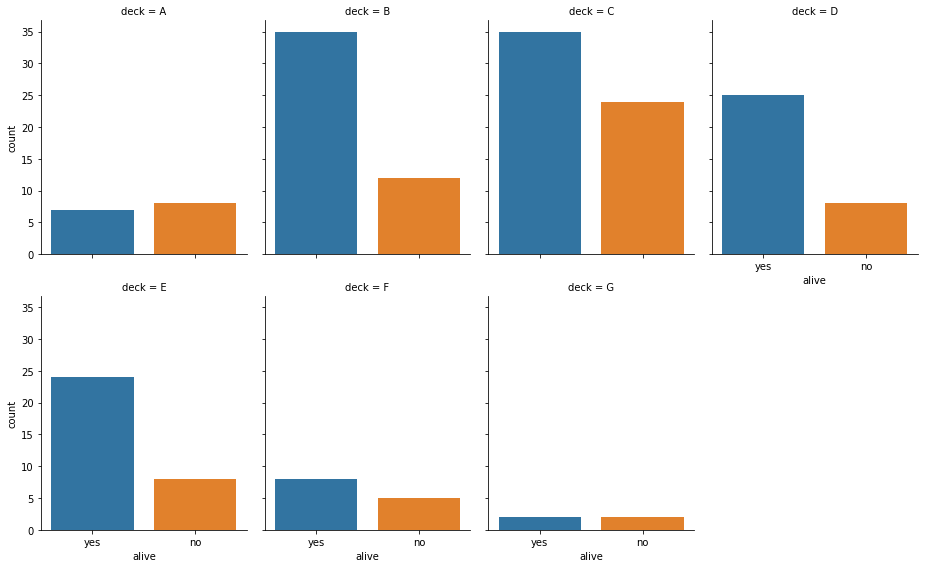

In [84]:
#FACTORPLOT--visualizing factors (catorgical variables)
# What is a factorplot? Check the documentation! Which data are we using? What is the count a count of?

g = sns.catplot("alive", col="deck", col_wrap=4, 
                   data=df[df.deck.notnull()], kind="count", height=4, aspect=.8)

What other options can you set with a factorplot in Seaborn? Using the code above as a starting point, create some code to create a factorplot with the data above, but in a different configuration. For example- make 2 plots per column, change the colors, add a legend, change the size, etc.

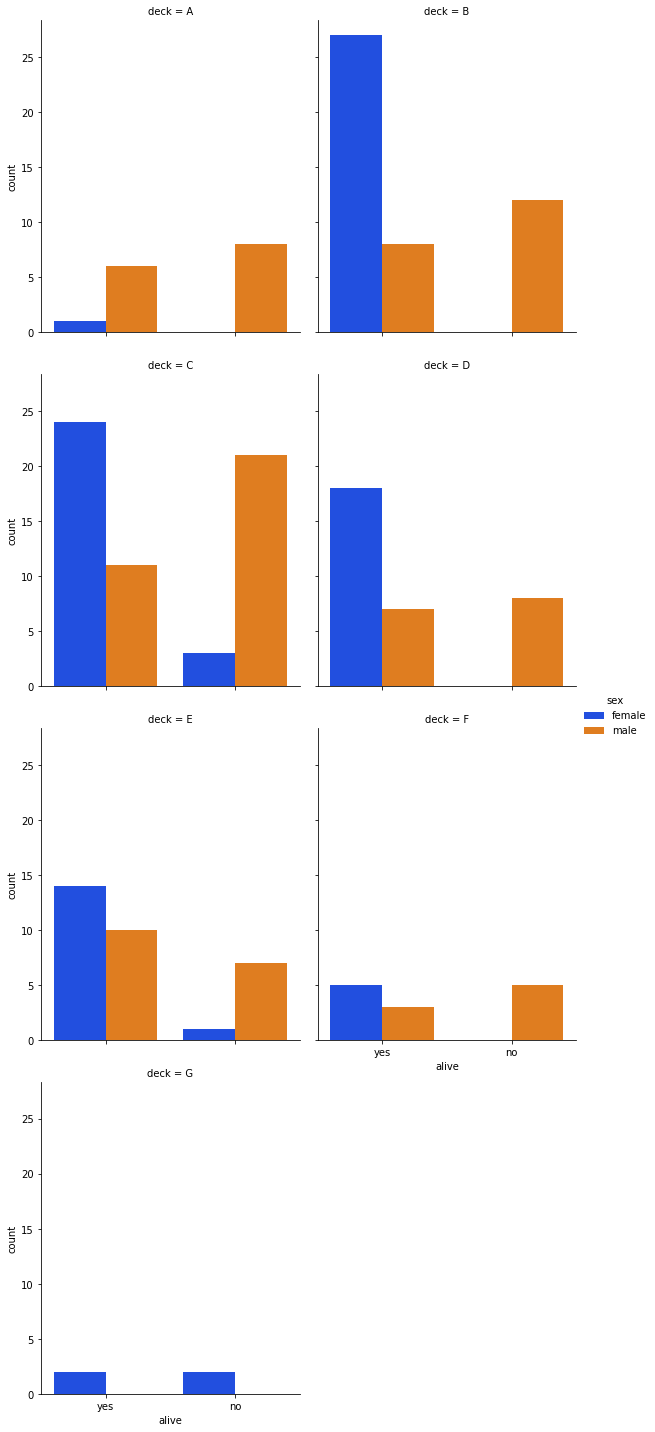

In [85]:
g = sns.catplot("alive", col="deck", col_wrap=2, 
                   data=df[df.deck.notnull()], kind="count", height=5, aspect=.8, 
                   hue="sex", legend="True", palette="bright")

As you saw in the factorplot documentation, you can specify several different types of plots in the parameters. Let's use factorplot to create a nested barplot showing passenger survival based on their class and sex. Fill in the missing pieces of the code below. 

The goal is a barplot showing survival probablility by class that further shows the sex of the passengers in each class. (Hint: how can you use the hue parameter?)

/Users/adammorris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


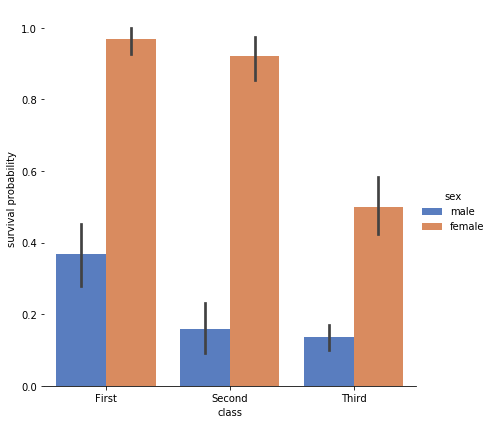

In [86]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", 
                   y="survived", 
                   hue="sex", 
                   data=df,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

Take a look at the code below. Let's again plot passenger survival based on their class and who they were (man, woman, child) but using a different plot for each class, like what we did above for the deck information.

/Users/adammorris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


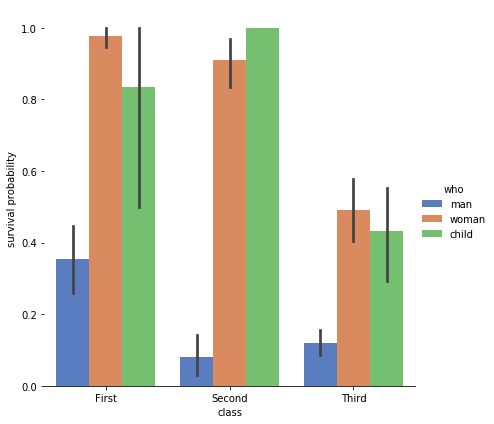

In [87]:
#BAR PLOT
# Draw a nested barplot to show survival for each class and sex
g = sns.catplot(x="class", 
                   y="survived", 
                   hue="who", 
                   data=df,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

Factorplot has 6 different kinds of plots, we explored two of them above. Using the documentation, try out one of the remaining plot types. A suggestion is provided below. You can follow it, and/or create your own visualization.

/Users/adammorris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


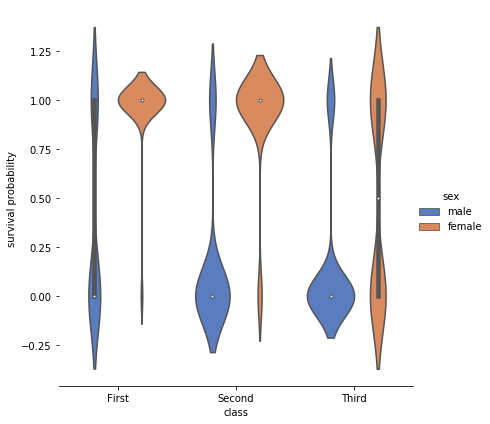

In [79]:
# With factorplot, make a violin plot that shows the age of the passengers at each embarkation point 
# based on their class. Use the hue parameter to show the sex of the passengers
# Draw a nested barplot to show survival for class and sex
#the white dot represents the median
#the thick gray bar in the center represents the interquartile range
#the thin gray line represents the 95% confidence interval
g = sns.catplot(x="class", 
                   y="survived", 
                   hue="sex", 
                   data=df,
                   height=6, kind="violin", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

### Pairplot

In the Wheat Classification notebook, we saw a scatter matrix. A scatter matrix plots each feature against every other feature. The diaganol showed us a density plot of just that data. Seaborn gives us this ability in the pairplot. In order to make a useful pairplot with the data, let's update some information. 

In [88]:
df.age = df.age.fillna(df.age.mean())

/Users/adammorris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/adammorris/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/adammorris/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/adammorris/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype

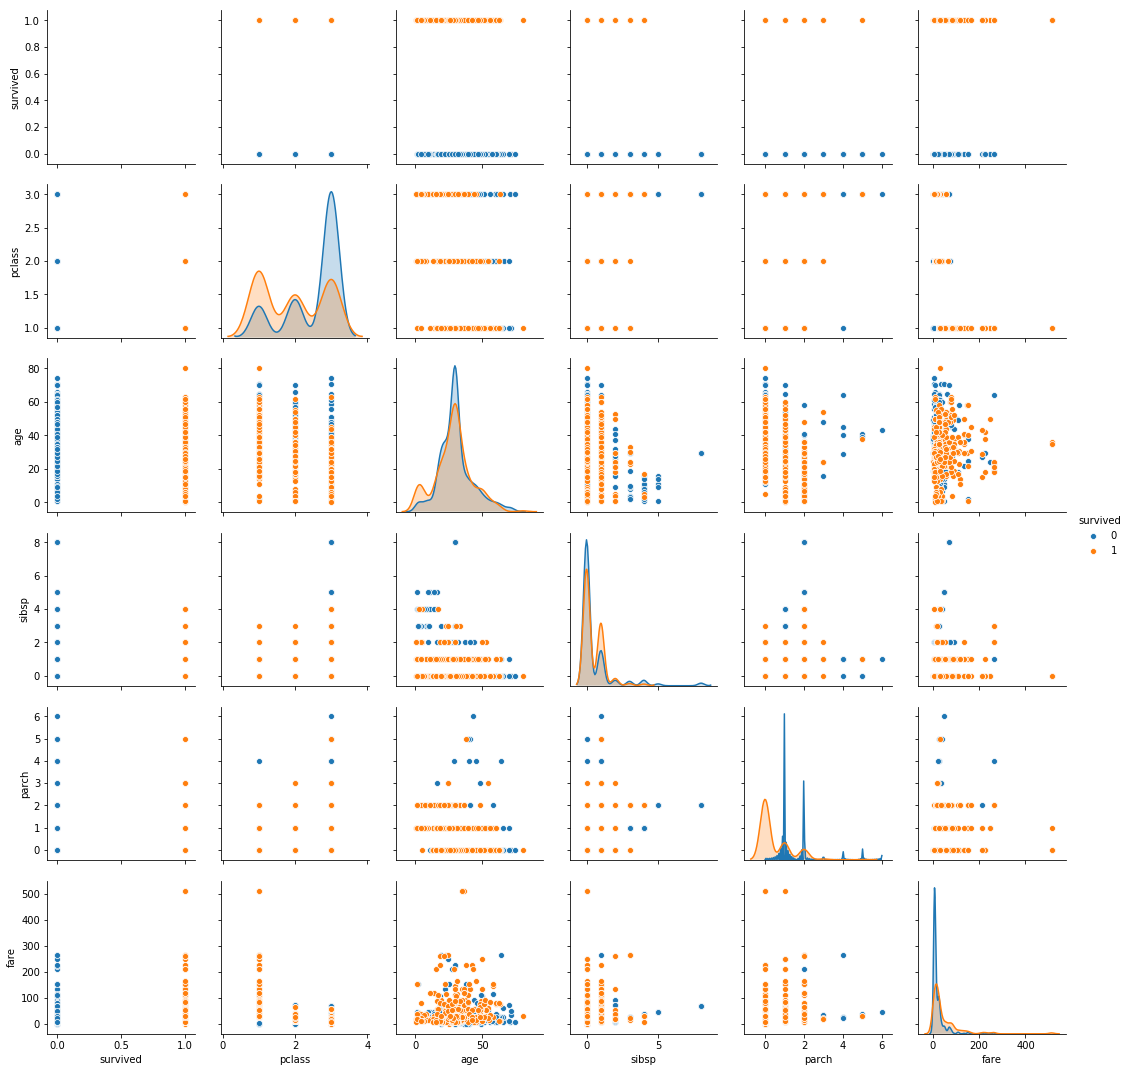

In [89]:
#PAIRPLOT-shows density plot of data
g = sns.pairplot(data=df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']], hue='survived', dropna=True)

The Titanic data gives an idea of what we can see with a pairplot, but it might not be the most illustrative example. Using the information provided so far, make a pairplot using the seaborn car crashes data.

/Users/adammorris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/adammorris/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/adammorris/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/adammorris/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/adammorris/anaconda3/lib/py

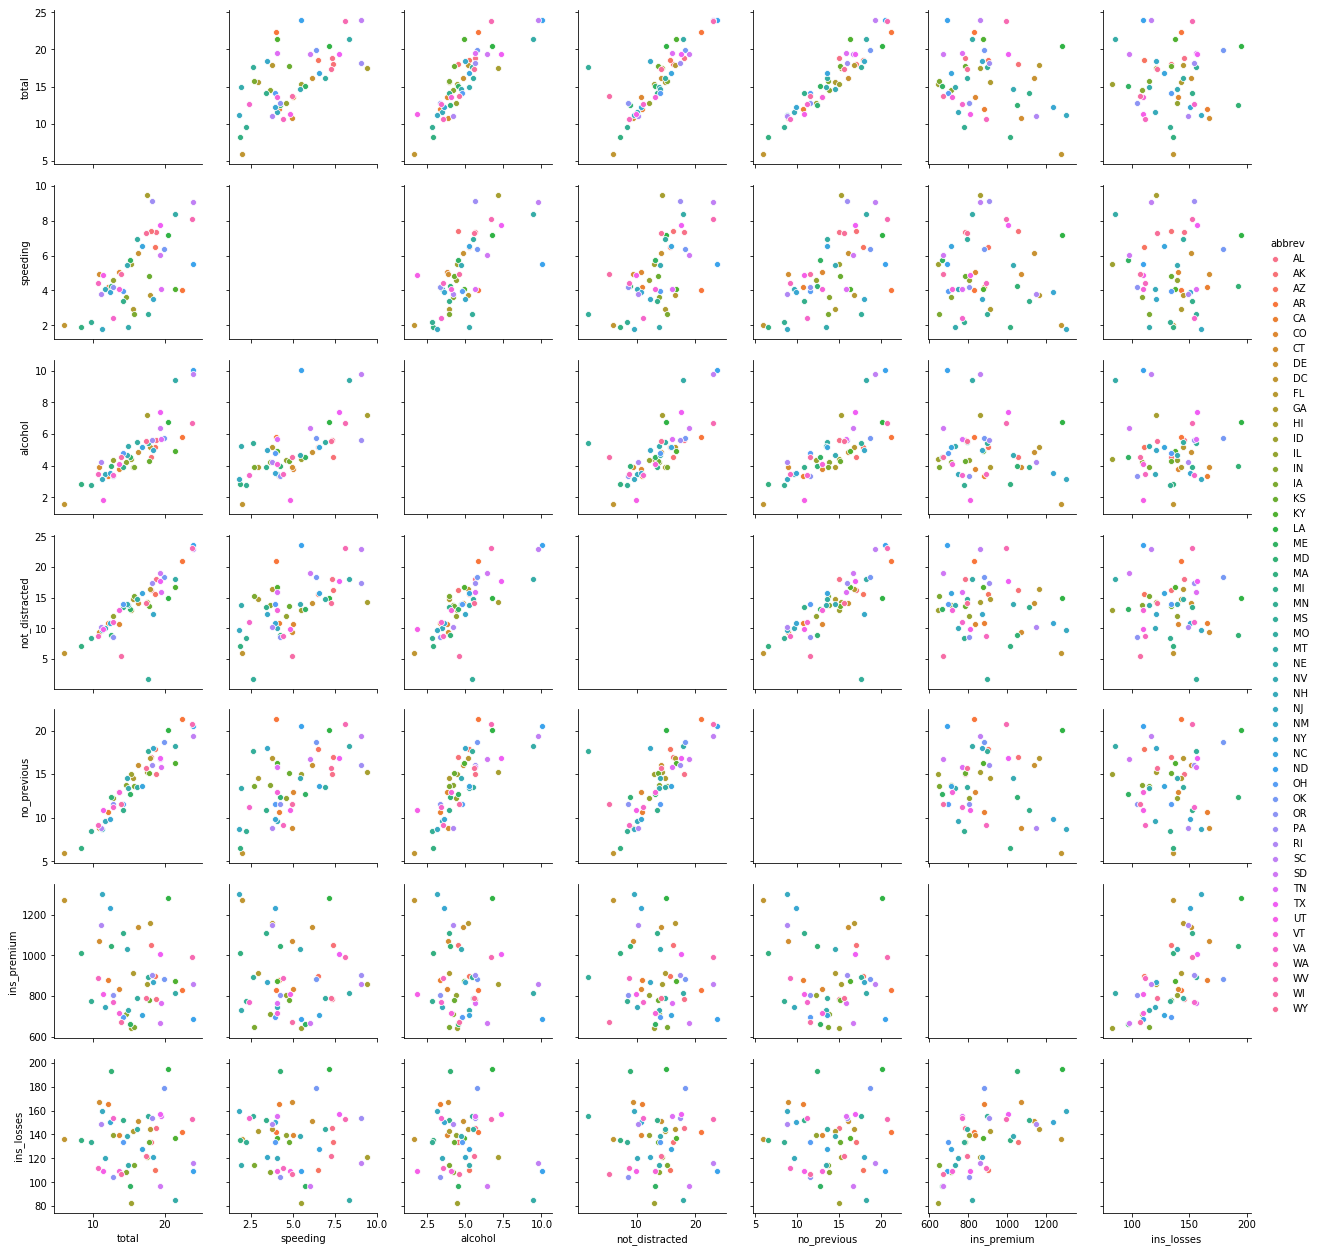

In [90]:
# Pairplot of the crash data
crash = sns.load_dataset('car_crashes')
g = sns.pairplot(crash, hue='abbrev')

### Jointplot

Like pairplots, a jointplot shows the distribution between features. It also shows individual distributions of the features being compared.

/Users/adammorris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


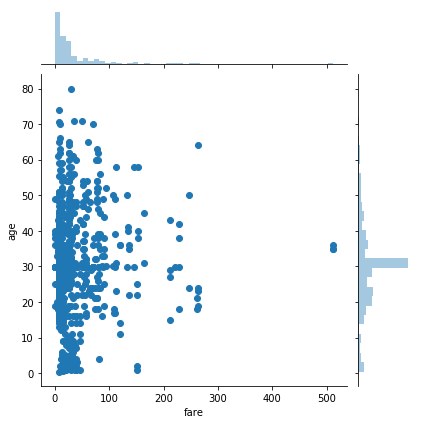

In [91]:
#JOINTPLOT--shows distribution between features.
g = sns.jointplot("fare", "age", df)

Using either the Titanic or crash data, create some jointplots.

/Users/adammorris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


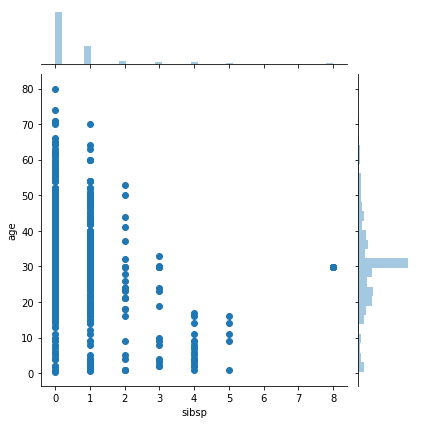

In [92]:
#relationship between sibling status and age
g = sns.jointplot("sibsp", "age", df)
# Jointplot, titanic data


/Users/adammorris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


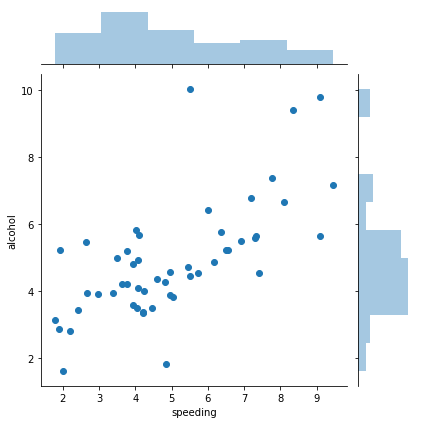

In [71]:
# Jointplot, crash data
g = sns.jointplot("speeding", "alcohol", crash)

### Bonus
Use the Titanic data to create a boxplot of the age distribution on each deck by class.

### Extra Bonus
Plot the same inforamtion using FacetGrid.

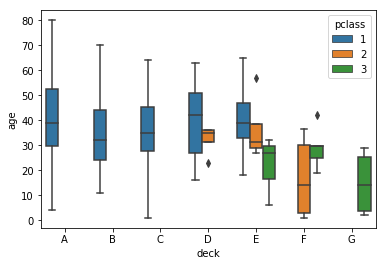

In [93]:
#  boxplot of the age distribution on each deck by class
sns.boxplot(x="deck", y="age", hue="pclass", data=df)

/Users/adammorris/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


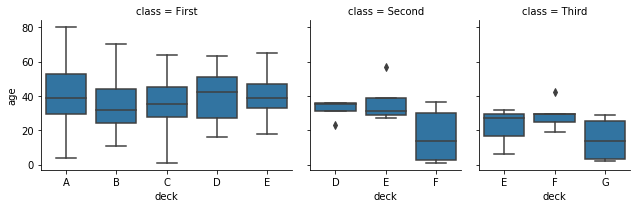

In [94]:
#  boxplot of the age distribution on each deck by class using FacetGrid
titanic = df.assign(deck=df.deck.astype(object)).sort_values("deck")
g = sns.FacetGrid(titanic, col="class", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "deck", "age")